In [ ]:
# Task 1

In [1]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread("/home/sasuke/Downloads/einstein.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur1 = cv2.GaussianBlur(img, (5, 5), 0)
blur2 = cv2.GaussianBlur(img, (9, 9), 0) # we can try diffrent standar deviation instead of 0 here
diffrence = blur2 - blur1

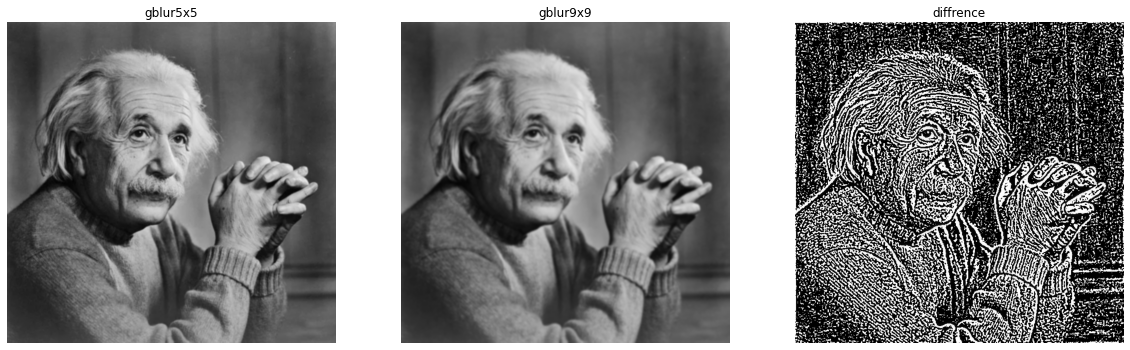

In [4]:
title = ['gblur5x5', 'gblur9x9', 'diffrence']
images = [blur1, blur2, diffrence]
plt.rcParams['figure.figsize'] = (20, 10)
for _ in range(len(images)):
    plt.subplot(1, len(images), _ + 1)
    plt.imshow(images[_])
    plt.title(title[_])
    plt.axis('off')
plt.show()

In [ ]:
#Task 2

In [1]:
import cv2
import os
import numpy as np

In [7]:
vid = cv2.VideoCapture('/home/sasuke/Downloads/Vid.mp4')
train_img = cv2.imread("/home/sasuke/Downloads/3931.jpg")
train_img = cv2.cvtColor(train_img, cv2.COLOR_RGB2HSV)
os.chdir("/home/sasuke/Downloads/tmp")
# histogram
train_hist = cv2.calcHist([train_img], [0, 1], None, [180, 256], [0, 180, 0, 256])
success = True
count = 0
while success == True and count != 1200:
    success, frame = vid.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
    res = cv2.calcBackProject([hsv], [0, 1], train_hist, [0, 180, 0, 256], 1)
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    cv2.filter2D(res, -1, disc, res)
    _, thresh = cv2.threshold(res, 20, 255, cv2.THRESH_BINARY)
    final = cv2.merge((thresh,thresh,thresh))
    result = cv2.bitwise_and(frame, final)
    kernel = np.ones((3, 3), np.uint8)
    result = cv2.dilate(result, kernel, iterations = 1)
    cv2.imwrite("%d.jpg" % count, result)
    success, frame = vid.read()
    count += 1
# outputs is 1200 frames in tmp folder